In [3]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
from scipy.stats import skew
from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
from scipy.stats import chi2_contingency   # For Chi-Sq

In [4]:
#Reading the csv file AxisInsurance.csv
df=pd.read_csv('/content/drive/MyDrive/stats/class-6/insurance.csv')
insured=df.copy()
insured.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
insured.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [6]:
insured.shape

(1338, 7)

## Statistical Analysis

### 1.Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?


- Step 1: Define null and alternative hypothesis

 **𝐻0:𝜇1<=𝜇2**
  The average charges of smokers is less than or equal to nonsmokers

 **𝐻𝑎:𝜇1>𝜇2**
  The average charges of smokers is greater than nonsmokers


- Step 2: Decide the significance level. If P values is less than alpha reject the null hypothesis.
α = 0.05

- Step 3: Identify the test

  Standard deviation of the population is not known ,will perform a T stat test . The > sign in alternate hypothesis indicate test is right tailed.

- Step 4: Calculate the test-statistics and p-value

In [7]:
smoker=insured.loc[insured.smoker=="yes"]
smoker.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
11,62,female,26.3,0,yes,southeast,27808.73
14,27,male,42.1,0,yes,southeast,39611.76
19,30,male,35.3,0,yes,southwest,36837.47
23,34,female,31.9,1,yes,northeast,37701.88


In [8]:
smoker.count()

age         274
sex         274
bmi         274
children    274
smoker      274
region      274
expenses    274
dtype: int64

In [9]:
nonsmoker=insured.loc[insured.smoker=='no']
nonsmoker.head()

,age,sex,bmi,children,smoker,region,expenses
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62


In [10]:
nonsmoker.count()

age         1064
sex         1064
bmi         1064
children    1064
smoker      1064
region      1064
expenses    1064
dtype: int64

In [11]:
# Adjusting the size of the rows to be equal
nonsmoker = nonsmoker[-274:]
charges_yes = smoker.expenses
charges_no = nonsmoker.expenses

In [12]:
print('Average Cost charged to Insurance for smoker is {} and nonsmoker is {} '.format(charges_yes.mean(),charges_no.mean()))

Average Cost charged to Insurance for smoker is 32050.23197080292 and nonsmoker is 8441.249051094892 


[Text(0.5, 1.0, 'Fig:1 Smoker vs Charges')]

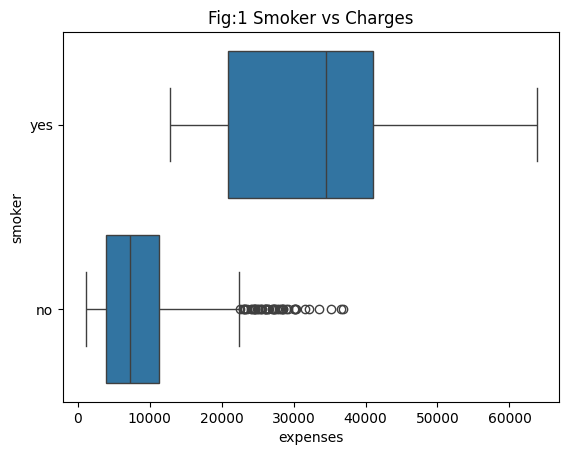

In [13]:
#smoker vs charges
sns.boxplot(x=insured.expenses,y=insured.smoker,data=insured).set(title="Fig:1 Smoker vs Charges")

In [14]:
alpha=0.05
t_statistic_1, p_value_1 = stats.ttest_ind(charges_yes, charges_no)
p_value_onetail=p_value_1/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic_1,p_value_1, p_value_onetail ))

Test statistic = 30.168384437358966 , Pvalue =2.160498763712875e-118 , OnetailPvalue = 1.0802493818564374e-118


In [15]:
if p_value_1 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_onetail,alpha) )
    print("Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.")

else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    print("Failed to Reject Null Hypothesis that Average charges for smokers are less than nonsmoker.")

Conclusion:Since P value 1.0802493818564374e-118 is less than alpha 0.05 
Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.


- Step 5: Decide whethere to reject or failed to reject null hypothesis

  We reject the null hypothesis and can conclude that people who smoke have on an average larger medical claim compared to people who don't smoke. Similar result can also been seen in Fig no.1 Smokers Vs Charges

### 2.Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

Let  𝜇1𝜇2
  and be the respective population means for BMI of males and BMI of females
- Step 1: Define null and alternative hypothesis

 **𝐻0:𝜇1−𝜇2=0**
  There is no difference between the BMI of Male and BMI of female.

 **𝐻𝑎:𝜇1−𝜇2!=0**
  There is difference between the BMI of Male and BMI of female.
- Step 2: Decide the significance level
α = 0.05

- Step 3:Identify the test Standard deviation of the population is not known ,will perform a T stat test.Not equal to sign in alternate hypothesis indicate its a two tailed test.

- Step 4: Calculate the test-statistics and p-value

In [16]:
#get all observation for male.
df_male=insured.loc[insured.sex=="male"]
#get all observation for females
df_female=insured.loc[insured.sex=="female"]

In [17]:
#get bmi of male and female
bmi_female=df_female.bmi
bmi_male=df_male.bmi

<Axes: xlabel='bmi', ylabel='Density'>

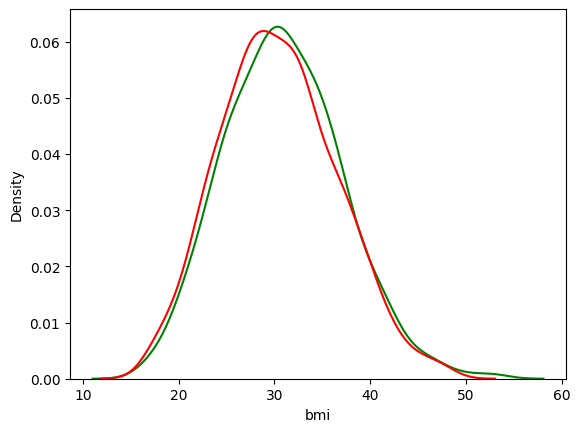

In [18]:
sns.distplot(bmi_male,color='green',hist=False)
sns.distplot(bmi_female,color='red',hist=False)

In [19]:
df_female.bmi.mean()

30.3797583081571

In [20]:
df_male.bmi.mean()

30.94526627218935

In [21]:
# get statistic and p value
t_statistic_2, p_value_2 = stats.ttest_ind(bmi_male, bmi_female)
print("tstats = ",t_statistic_2, ", pvalue = ", p_value_2)

tstats =  1.6970846764986391 , pvalue =  0.08991356987176295


In [22]:
if p_value_2 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_2,alpha) )
    print("Reject Null Hypothesis  that there is no difference in bmi of men and bmi of female.")

else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_2,alpha))
    print("Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .")

Conclusion:Since P value 0.08991356987176295 is greater than alpha 0.05 
Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .


Conclusion:Since P value 0.08997637178984932 is greater than alpha 0.05
Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .

- Step 5: Decide to reject or accept null hypothesis
We fail to reject the null hypothesis and can conclude that There is no difference between BMI of Female and BMI of Male.

### 3.Is the proportion of smokers significantly different across different regions?

- Step 1: Define null and alternative hypotheses

 **H0** Smokers proportions is not significantly different across different regions

 **Ha** Smokers proportions is different across different regions

- Step 2: Decide the significance level
α = 0.05

- Step 3: Identify Test

  Here we are comparing two different categorical variables, smoker and different region. So perform a Chi-sq Test.
- Step 4: Calculate the test-statistics and p-value


In [23]:
contigency= pd.crosstab(insured.region, insured.smoker)
contigency

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


<Axes: xlabel='region'>

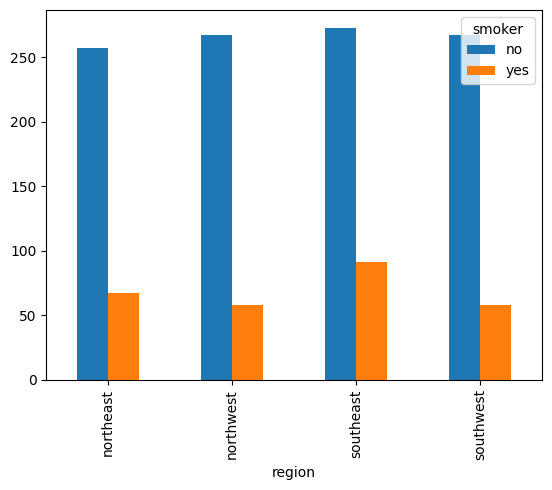

In [24]:
contigency.plot(kind='bar')

In [25]:
# Using the chi2_contingency test
chi2, pval, dof, exp_freq = chi2_contingency(contigency, correction = False)
print('chi-square statistic: {} , Pvalue: {} , Degree of freedom: {} ,expected frequencies: {} '.format(chi2, pval, dof, exp_freq))

chi-square statistic: 7.343477761407071 , Pvalue: 0.06171954839170541 , Degree of freedom: 3 ,expected frequencies: [[257.65022422  66.34977578]
 [258.44544096  66.55455904]
 [289.45889387  74.54110613]
 [258.44544096  66.55455904]] 


In [26]:
if (pval < 0.05):
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Failed to reject Null Hypothesis


- Step 5: Decide to reject or accept null hypothesis
We failed to reject the null hypothesis and conclude that Smoker proportions is not significantly different across different regions.

### 4.Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

- Step 1: Define null and alternative hypotheses

 **H0: μ1 = μ2 = μ3** The mean BMI of women with no children , one child,two children is same

 **Ha:** Atleast one of mean BMI of women is not same

- Step 2: Decide the significance level
α = 0.05

- Step 3: Identify Test
One-way ANOVA - Equality of population through variances of samples.

- Step 4: Calculate the test-statistics and p-value


In [27]:
# Filtering data of only women with 0, 1 and 2 children
df_female_child = df_female.loc[df_female['children']<=2]
df_female_child.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
9,60,female,25.8,0,no,northwest,28923.14
11,62,female,26.3,0,yes,southeast,27808.73


In [28]:
# Check the unique values in the 'children' column
print(df_female_child['children'].unique())

# If necessary, convert data type of 'children' column to numeric
# df_female_child['children'] = pd.to_numeric(df_female_child['children'])

# Group by 'children' and calculate the mean BMI
mean_bmi_by_children = df_female_child.groupby('children')['bmi'].mean()
print(mean_bmi_by_children)

[0 1 2]
children
0    30.364360
1    30.053165
2    30.651261
Name: bmi, dtype: float64


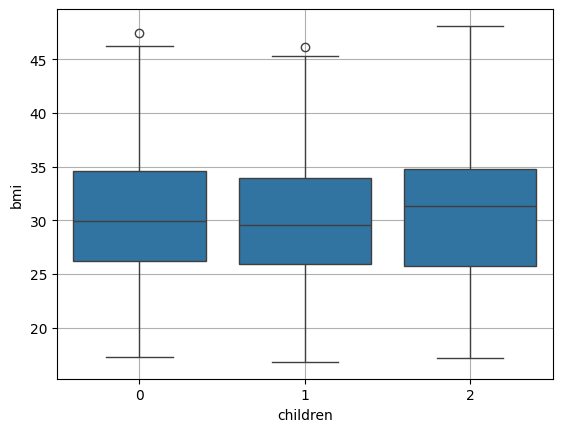

In [29]:
# Women BMI with children 0, 1, 2;
import seaborn as sns
sns.boxplot(x="children", y="bmi", data=df_female_child)
plt.grid()
plt.show()

In [30]:
# Applying ANOVA and cheking each children count (0,1,2) with the bmi;
formula = 'bmi ~ C(children)'
model = ols(formula, df_female_child).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(children),2.0,24.697248,12.348624,0.335906,0.714834
Residual,563.0,20697.093635,36.762156,NaN,NaN


- Step 5: Decide to reject or accept null hypothesis
P value is 0.715858 and it is greater than aplha(0.05) ,We failed to reject the null hypothesis and conclude that mean Bmi of women with no children,one children, two children is same.

###Two way ANOVA
H0: There is no interaction effect between the number of children and smoking status on BMI.

Ha: There is an interaction effect between the number of children and smoking status on BMI.

- Step 2: Decide the significance level α = 0.05

- Step 3: Identify Test: Two-way ANOVA

- Step 4: Calculate the test-statistics and p-value

In [38]:
# Create a two-way ANOVA model
# Define the formula for the two-way ANOVA
formula = 'bmi ~ C(children) + C(smoker) + C(children):C(smoker)'
model = ols(formula, df_female_child).fit()

# Perform ANOVA and get the ANOVA table
anova_table = anova_lm(model)
print(anova_table)

                          df        sum_sq    mean_sq         F    PR(>F)
C(children)              2.0     24.697248  12.348624  0.335320  0.715253
C(smoker)                1.0     38.764020  38.764020  1.052614  0.305349
C(children):C(smoker)    2.0     35.528894  17.764447  0.482383  0.617567
Residual               560.0  20622.800721  36.826430       NaN       NaN


###Apply the **Mann-Whitney U test** to compare medical expenses between males and females, the null and alternative hypotheses can be stated as follows

**Null Hypothesis (H0):** There is no significant difference in medical expenses between males and females. Mathematically, it can be represented as:

H0: μ1 = μ2

Where:

μ1 is the mean medical expenses for females

μ2 is the mean medical expenses for males

**Alternative Hypothesis (H1):** There is a significant difference in medical expenses between males and females. Mathematically, it can be represented as:

H1: μ1 ≠ μ2 (two-tailed test)

H1: μ1 > μ2 (right-tailed test)

H1: μ1 < μ2 (left-tailed test)



The Mann-Whitney U test, also known as the Wilcoxon rank-sum test, is a non-parametric test used to compare two independent groups when the data are ordinal or continuous but not normally distributed. Here are some scenarios where you might apply the Mann-Whitney U test:

Comparing Two Independent Groups: When you have two groups of observations and you want to determine if there is a significant difference between them. For example:

Comparing medical expenses between males and females.
Comparing test scores between students who received different teaching methods.
Small Sample Size: When you have a small sample size and cannot assume normality. In such cases, parametric tests like the t-test may not be appropriate, and the Mann-Whitney U test provides a robust alternative.

Non-Normal Data: When your data violate the assumption of normality required by parametric tests like the t-test. This could be due to skewed distributions, outliers, or other factors.

Ordinal Data: When your data are ordinal (i.e., ranked in a specific order) rather than interval or ratio scaled. In such cases, the Mann-Whitney U test is suitable for comparing the central tendencies of the two groups.

Assumption Violation: When you are unsure about the assumption of equal variances required by parametric tests. The Mann-Whitney U test does not assume equal variances between groups.

Homogeneity of Variance: When you cannot assume homogeneity of variance between groups, which is required for some parametric tests like the t-test.

In [33]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Null hypothesis: There is no significant difference in medical expenses between males and females
# Alternative hypothesis: There is a significant difference in medical expenses between males and females

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(insured[insured['sex'] == 'female']['expenses'], insured[insured['sex'] == 'male']['expenses'])

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)

# Set significance level
alpha = 0.05

# Interpret the p-value
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in expenses between males and females.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in expenses between males and females.")


Mann-Whitney U statistic: 221304.0
p-value: 0.7286510894470093
Fail to reject the null hypothesis: There is no significant difference in expenses between males and females.


# Exmaple for Chi-square test of independence

Example: Use the chi-squared test of independence to determine whether the Sex and Smoker features in tips dataset from seaborn is likely to be related or not.

H0: (The two variables are independent)

H1: (The two variables are not independent)


In [34]:
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np

dataset=sns.load_dataset('tips')
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [35]:
#Apply pandas crosstab to get the cross matrix with respect to two categorical variables.
dataset_table=pd.crosstab(dataset['sex'],dataset['smoker'])
print(dataset_table)


smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [36]:
#Apply Chi-square test of independence
val=stats.chi2_contingency(dataset_table)
val

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]]))